# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [12]:
df = pd.read_csv('kyphosis.csv')

In [13]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


We'll just check out a simple pairplot for this small dataset.

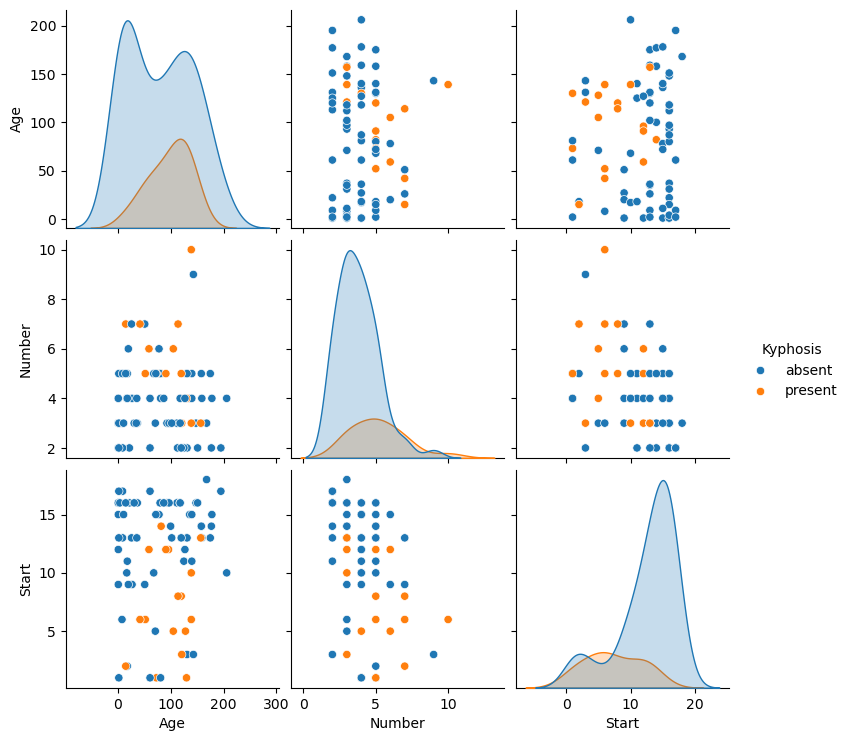

In [15]:
sns.pairplot(df, hue="Kyphosis")

In [16]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

## Train Test Split

Let's split up the data into a training set and a test set!

In [28]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

# Splitting the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (56, 3)
Testing data shape: (25, 3)


## Decision Trees

We'll start just by training a single decision tree.

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predict on the test set
y_pred = tree_model.predict(X_test)

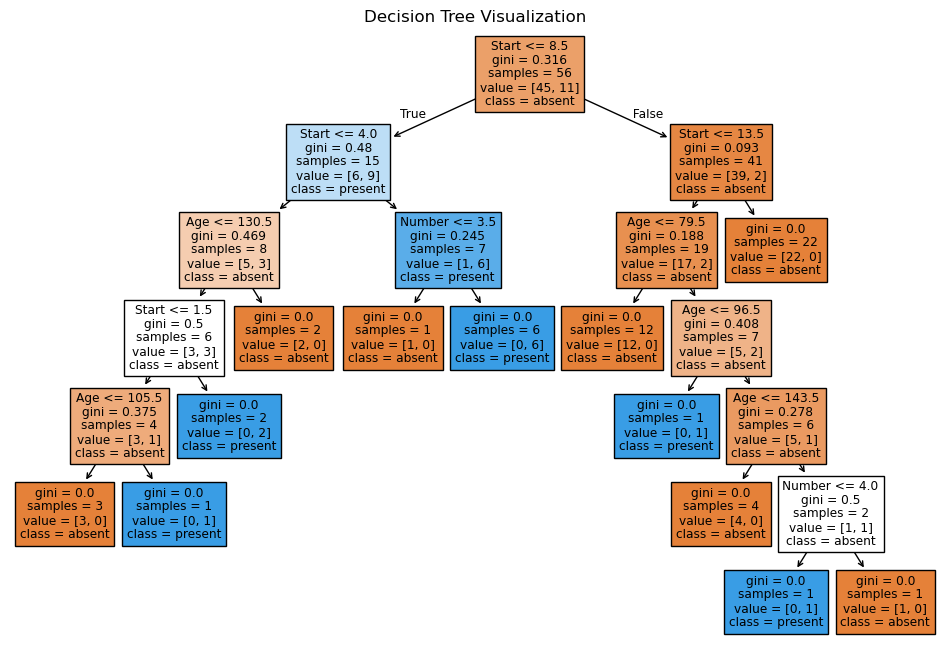

In [38]:
from sklearn.tree import plot_tree

# Define class names manually
class_names = ["absent", "present"]

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[16  3]
 [ 4  2]]

Classification Report:
              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



## Random Forests

Now let's compare the decision tree model to a random forest.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [35]:
# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

In [36]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix:")
print(rf_conf_matrix)

# Classification Report
rf_class_report = classification_report(y_test, y_rf_pred)
print("\nClassification Report:")
print(rf_class_report)

Confusion Matrix:
[[19  0]
 [ 5  1]]

Classification Report:
              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

